# Import Libraries and Load Data
Import necessary libraries (pandas, numpy, matplotlib). Load the CSV file and extract the latency values for the 100 requests.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the CSV file
_LATENCY_CSV_PATH = os.path.join(os.environ.get("HOME", ""), "scratch", "latency.csv")
data = pd.read_csv(_LATENCY_CSV_PATH)
data.columns = data.columns.str.strip()

# Extract the latency values for the 100 requests
latency_values = data["latency"].values[:100]

# Calculate the CDF of Latency Data
Sort the latency data and compute the cumulative distribution function (CDF) for visualization.

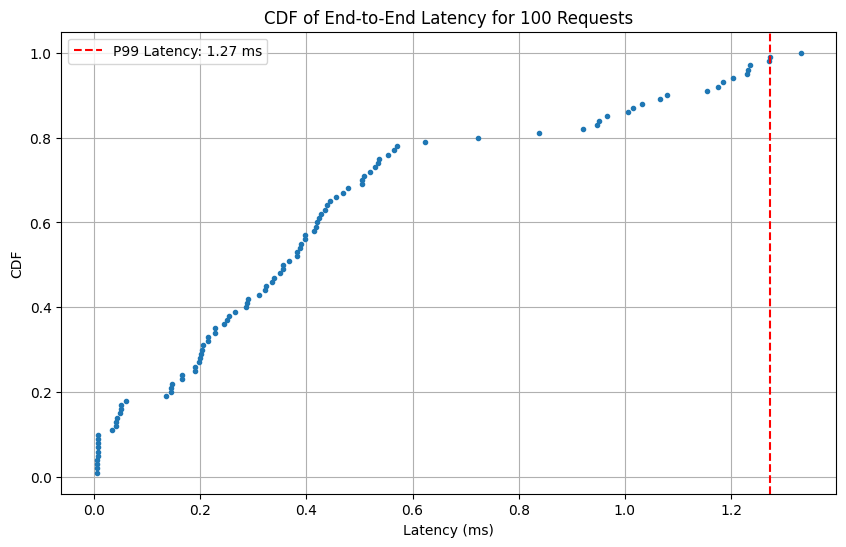

In [3]:
# Calculate the CDF of Latency Data

# Sort the latency values
sorted_latency = np.sort(latency_values)

# Compute the CDF values
cdf = np.arange(1, len(sorted_latency) + 1) / len(sorted_latency)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_latency, cdf, marker='.', linestyle='none')
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('CDF of End-to-End Latency for 100 Requests')

# Mark the P99 latency on the plot
p99_latency = np.percentile(sorted_latency, 99)
plt.axvline(p99_latency, color='r', linestyle='--', label=f'P99 Latency: {p99_latency:.2f} ms')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()